<a href="https://colab.research.google.com/github/chwdoit/BigData/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(2023)
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(8, 4))
import seaborn as sns

In [ ]:
sns.set_theme() # seaborn 스타일로 그래프를 설정

In [ ]:
from sklearn.datasets import fetch_openml # 데이터셋을 가져오는 함수, 열라벨 데이터를 feature 라고 사용한다.

In [ ]:
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


- 1309명 승객의 데이터 포함.

- `X`: 13개의 열(특성) 사용.

| 열 특성 | 의미 |
| :--- | :--- |
| Pclass | 승객 클래스(1 = 1등석; 2 = 2등석; 3 = 3등석) |
| name | 이름 |
| sex | 성(male=남성, female=여성) |
| age | 나이 |
| sibsp | 함께 승선한 형제, 자매, 배우자 수 |
| parch | 함께 승선한 부모 자식 수 |
| ticket | 티켓 번호 |
| fare | 티켓 요금 (영국 파운드) |
| cabin | 객실 번호 |
| embarked | 승선한 항구 (C = Cherbourg; Q = Queenstown; S = Southampton) |
| boat | 침몰시 탑승한 구명보트 번호 |
| body | 사망자인 경우 지정된 번호 |
| home.dest | 고향/목적지 |

In [ ]:
X.shape

(1309, 13)

In [ ]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
# y : suvived 생존여부(0 : 사망, 1: 생존)
y.name
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): ['0', '1']

In [ ]:
y.info() # dtype 범주형 데이터 => 문자열이다.

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: survived
Non-Null Count  Dtype   
--------------  -----   
1309 non-null   category
dtypes: category(1)
memory usage: 1.5 KB


In [ ]:
y = y.astype('i4') # 원활한 분석을 위해 정수 자료형으로 변환
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int32

In [ ]:
# 데이터 정제(특성을 제거, 결측치 처리)
X.drop(['boat', 'body', 'home.dest', 'ticket'], axis=1, inplace=True)
X.head()

,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,B5,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,C22 C26,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,C22 C26,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,C22 C26,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,C22 C26,S


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   name      1309 non-null   object  
 2   sex       1309 non-null   category
 3   age       1046 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   fare      1308 non-null   float64 
 7   cabin     295 non-null    object  
 8   embarked  1307 non-null   category
dtypes: category(2), float64(5), object(2)
memory usage: 74.5+ KB


In [ ]:
X.isnull().any() # 결측있는 칼럼(피쳐) 확인

pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
fare         True
cabin        True
embarked     True
dtype: bool

In [ ]:
X.isnull().sum() # 결측치 갯수 합계

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
dtype: int64

In [ ]:
miss_vals = X.isnull().sum() / len(X) * 100 # 결측치 비율 확인
miss_vals

pclass       0.000000
name         0.000000
sex          0.000000
age         20.091673
sibsp        0.000000
parch        0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
dtype: float64

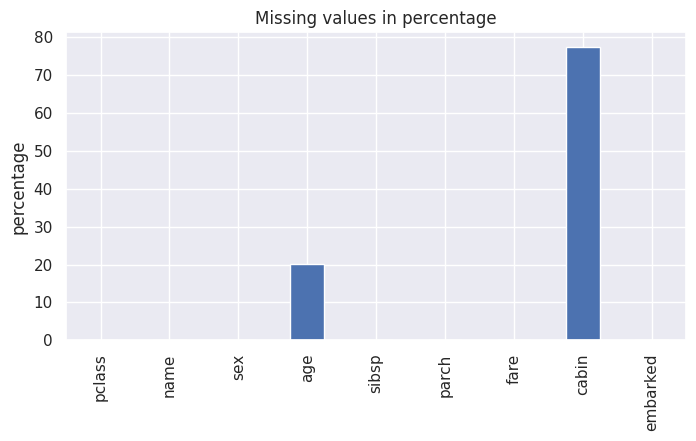

In [ ]:
# 결측치 비율 그래프로 그리기
miss_vals.plot(kind='bar', title='Missing values in percentage',
               ylabel='percentage')
plt.show()

In [ ]:
X.drop(['cabin'], axis=1, inplace=True) # 결측치가 많은 cabin 칼럼 삭제

In [ ]:
X.isnull().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [ ]:
# 데이터 전처리
# family 칼럼 생성 및 추가
X['family'] = pd.concat([X['parch'], X['sibsp']], axis=1).sum(axis=1)
X

,pclass,name,sex,age,sibsp,parch,fare,embarked,family
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,S,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,S,3.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,S,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,S,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,S,3.0
...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,14.4542,C,1.0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,14.4542,C,1.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,7.2250,C,0.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,7.2250,C,0.0


In [ ]:
X.drop(['sibsp', 'parch'], axis=1, inplace=True)
X

,pclass,name,sex,age,fare,embarked,family
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,3.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,3.0
...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,14.4542,C,1.0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,14.4542,C,1.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250,C,0.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,7.2250,C,0.0


In [ ]:
# is_alone 추가
X['is_alone'] = '0' # 모든 값을 문자열 0으로 지정
mask = X['family'] == 0 # 가족이 0인경우 문자열 1로 처리
X.loc[mask, 'is_alone'] = '1'
X

In [ ]:
X.is_alone

In [ ]:
X

In [ ]:
X['title'] =  X['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
X.drop(['name'], axis=1, inplace=True)
X.head()

,pclass,sex,age,fare,embarked,family,title
0,1.0,female,29.0000,211.3375,S,0.0,Miss
1,1.0,male,0.9167,151.5500,S,3.0,Master
2,1.0,female,2.0000,151.5500,S,3.0,Miss
3,1.0,male,30.0000,151.5500,S,3.0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,Mrs


In [ ]:
pd.crosstab(X['title'], X['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [ ]:
# miss, mrs, ms 통합
# 남성으로 구성된 Master와 Mr 가 생존율 차이가 많이 난다.
print(f"Master: {np.sum(y[X.title == 'Master']) / len(X.title == 'Master')}")
print(f"Mr: {np.sum(y[X.title == 'Mr']) / len(X.title == 'Mr')}")

Master: 0.023682200152788387
Mr: 0.09396485867074103


In [ ]:
# 여성으로 구성된 Miss와 Mrs는 생존율이 거의 비슷하다.
print(f"Miss: {np.sum(y[X.title == 'Miss']) / len(X.title == 'Miss')}")
print(f"Mrs: {np.sum(y[X.title == 'Mrs']) / len(X.title == 'Mrs')}")

Miss: 0.13445378151260504
Mrs: 0.11841100076394194


In [ ]:
# Mrs 로 통일 : Ms, Lady, Mlle, Mme => 다 여성을 지칭, 갯수가 적음
mask = (X.title == 'Miss') | (X.title == 'Ms') | (X.title == 'Lady') | (X.title == 'Mlle') | (X.title == 'Mme')
X.loc[mask, 'title'] = 'Mrs'
X

,pclass,sex,age,fare,embarked,family,title
0,1.0,female,29.0000,211.3375,S,0.0,Mrs
1,1.0,male,0.9167,151.5500,S,3.0,Master
2,1.0,female,2.0000,151.5500,S,3.0,Mrs
3,1.0,male,30.0000,151.5500,S,3.0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,Mrs
...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,1.0,Mrs
1305,3.0,female,NaN,14.4542,C,1.0,Mrs
1306,3.0,male,26.5000,7.2250,C,0.0,Mr
1307,3.0,male,27.0000,7.2250,C,0.0,Mr


In [ ]:
X.title.value_counts() # 호칭별 갯수 확인

Mr              757
Mrs             463
Master           61
Dr                8
Rev               8
Col               4
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Name: title, dtype: int64

In [ ]:
etc_titles = (X['title'].value_counts() < 10)
etc_titles

Mr              False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Major            True
Capt             True
Sir              True
Dona             True
Jonkheer         True
the Countess     True
Don              True
Name: title, dtype: bool

In [ ]:
# etc 적용
X['title'] = X.title.apply(lambda x: 'etc' if etc_titles[x] else x)
X

,pclass,sex,age,fare,embarked,family,title
0,1.0,female,29.0000,211.3375,S,0.0,Mrs
1,1.0,male,0.9167,151.5500,S,3.0,Master
2,1.0,female,2.0000,151.5500,S,3.0,Mrs
3,1.0,male,30.0000,151.5500,S,3.0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,Mrs
...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,1.0,Mrs
1305,3.0,female,NaN,14.4542,C,1.0,Mrs
1306,3.0,male,26.5000,7.2250,C,0.0,Mr
1307,3.0,male,27.0000,7.2250,C,0.0,Mr


In [ ]:
X.title.value_counts() # 그니까  etc_title로 묶어서 10이하의 부르는 사람들을 모조리 etc로 묶었네

Mr        757
Mrs       463
Master     61
etc        28
Name: title, dtype: int64

In [ ]:
# 상관 분석
comb = pd.concat([X, y], axis=1)
comb

,pclass,sex,age,fare,embarked,family,title,survived
0,1.0,female,29.0000,211.3375,S,0.0,Mrs,1
1,1.0,male,0.9167,151.5500,S,3.0,Master,1
2,1.0,female,2.0000,151.5500,S,3.0,Mrs,0
3,1.0,male,30.0000,151.5500,S,3.0,Mr,0
4,1.0,female,25.0000,151.5500,S,3.0,Mrs,0
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,1.0,Mrs,0
1305,3.0,female,NaN,14.4542,C,1.0,Mrs,0
1306,3.0,male,26.5000,7.2250,C,0.0,Mr,0
1307,3.0,male,27.0000,7.2250,C,0.0,Mr,0


In [ ]:
comb.describe()

,pclass,age,fare,family,survived
count,1309.000000,1046.000000,1308.000000,1309.000000,1309.000000
mean,2.294882,29.881135,33.295479,0.883881,0.381971
std,0.837836,14.413500,51.758668,1.583639,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,7.895800,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,0.000000
75%,3.000000,39.000000,31.275000,1.000000,1.000000
max,3.000000,80.000000,512.329200,10.000000,1.000000


In [ ]:
# 수치형 특성 목록 확인
num_f = comb.describe().columns
num_f

Index(['pclass', 'age', 'fare', 'family', 'survived'], dtype='object')

In [ ]:
# 피어슨 상관 계수: 두 변수의 선형 상관 관계를 계량화한 수치입니다.
# 결과값은 -1 ~ 1 사이의 값이며, 양의 상관 관계가 있을수록 1에 가깝고, 음의 상관 관계가 있을수록 -1에 가깝습니다.
# 또한, 상관 관계가 없을수록 0에 가깝습니다. 생존자와 사망자를 가리기 위해 쓰는 거인듯

In [ ]:
corr = comb[num_f].corr()
corr

,pclass,age,fare,family,survived
pclass,1.000000,-0.408106,-0.558629,0.050027,-0.312469
age,-0.408106,1.000000,0.178739,-0.240230,-0.055513
fare,-0.558629,0.178739,1.000000,0.226492,0.244265
family,0.050027,-0.240230,0.226492,1.000000,0.026876
survived,-0.312469,-0.055513,0.244265,0.026876,1.000000


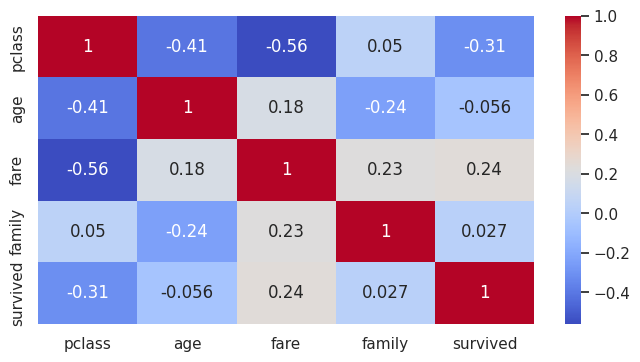

In [ ]:
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
sur = comb.survived.value_counts() # 0 : 사망자, 1 : 생존자
sur

0    809
1    500
Name: survived, dtype: int64

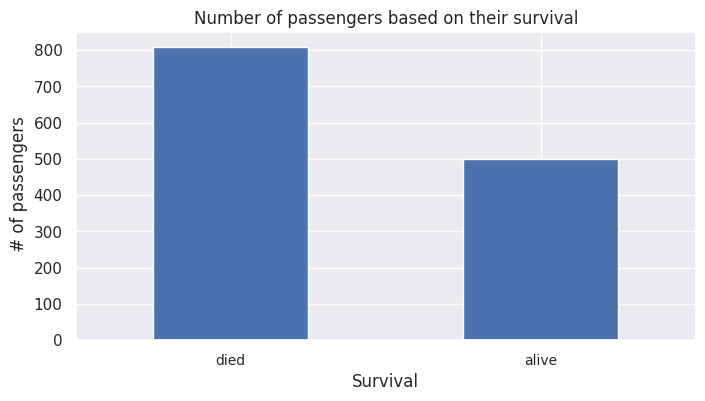

In [ ]:
fig, ax = plt.subplots()
sur.plot(kind='bar', xticks=[0,1], rot=0)
ax.set_xticklabels(['died', 'alive'], fontsize=10)
ax.set(xlabel='Survival', ylabel=' # of passengers', title='Number of passengers based on their survival')
plt.show()

In [ ]:
men_sur = ((comb['survived'][comb.sex == 'male']) == 1).sum() # 남자 생존자 수
men_sur

161

In [ ]:
n_men = comb.sex.value_counts().loc['male'] # 남자 탑승객 수
n_men

843

In [ ]:
men_sur / n_men # 남성 생존률

0.19098457888493475

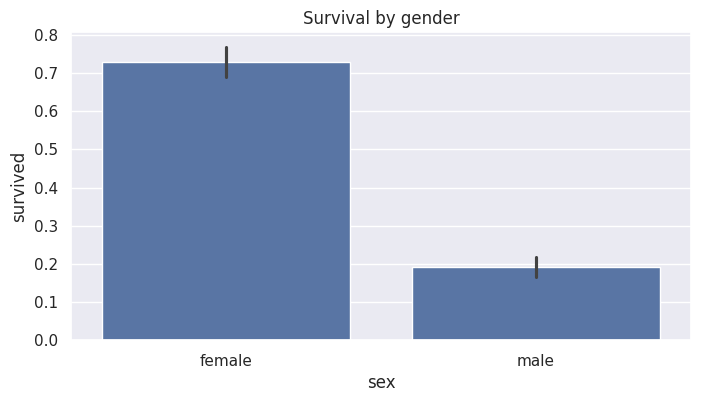

In [ ]:
# 생존자수(성별 구분)
sns.barplot(data=comb, x='sex', y='survived')
plt.title('Survival by gender')
plt.show()

In [ ]:
comb.age.isnull().sum() # 나이 피쳐의 결측치 갯수

263

In [ ]:
comb.age.dropna() # 전체 탑승객의 나이

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [ ]:
comb['age'][comb.survived == 1].dropna() # 생존자 나이

0       29.0000
1        0.9167
5       48.0000
6       63.0000
8       53.0000
         ...   
1261    63.0000
1277    22.0000
1286    38.0000
1290    47.0000
1300    15.0000
Name: age, Length: 427, dtype: float64

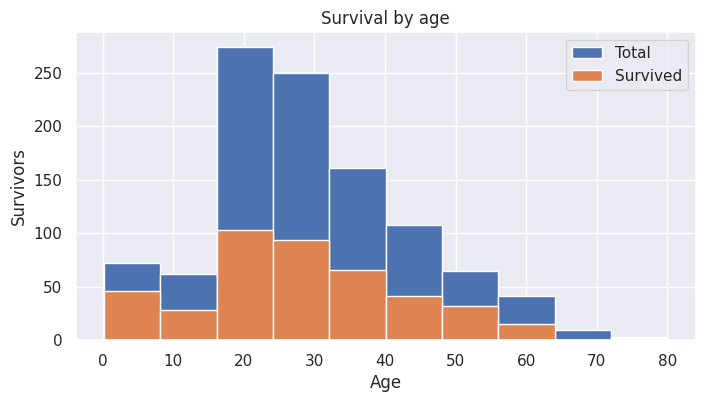

In [ ]:
fig, ax = plt.subplots()
ax.hist(comb.age.dropna(), label='Total')
ax.hist(comb['age'][comb.survived == 1].dropna(), label='Survived')
plt.ylabel('Survivors')
plt.xlabel('Age')
plt.title('Survival by age')
plt.legend() # 범례표시
plt.show() # 살아있는 사람들의 나이 지표

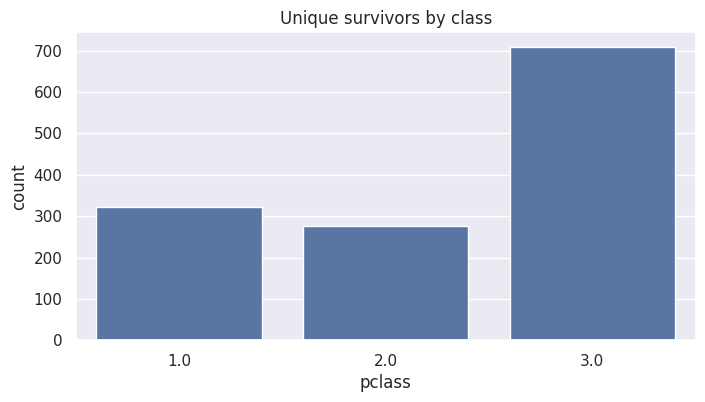

In [ ]:
sns.countplot(x='pclass', data=comb)
plt.title('Unique survivors by class')
plt.show()

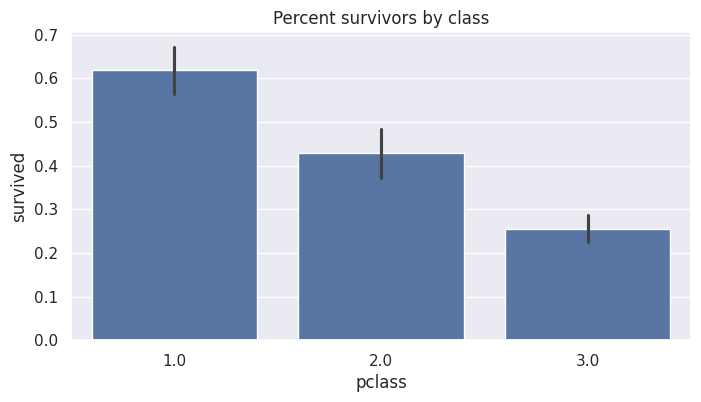

In [ ]:
sns.barplot(x='pclass', y='survived', data=comb)
plt.title('Percent survivors by class')
plt.show()

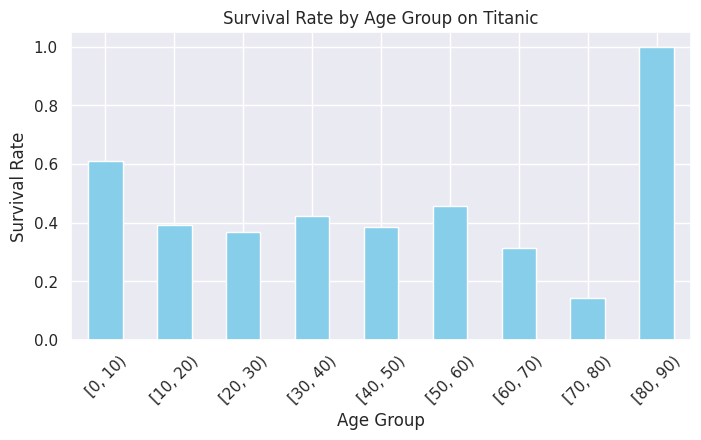

In [ ]:
# Q. 연령별 생존률을 bar.plot() 함수를 이용하여 구하라
# hint : 10살 단위로 구간을 나눈다
comb['AgeGroup'] = pd.cut(comb['age'], bins=range(0, 100, 10), right=False)
age_group_survival = comb.groupby('AgeGroup')['survived'].mean()
# 시각화
age_group_survival.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group on Titanic')
plt.xticks(rotation=45)
plt.show()